In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pygmo import hypervolume
import numpy as np

In [7]:
data_nd = pd.read_csv('../log/evolution_20250520_False.csv', names = ['dataset', 'nodes', 'inutility', 'disclosure_averseness', 'pareto_nodes', 'seed', 'generation', 'timing'])
data_nd['remove_copies'] = False

In [8]:
data_d = pd.read_csv('../log/evolution_20250520_True.csv', names = ['dataset', 'nodes', 'inutility', 'disclosure_averseness', 'pareto_nodes', 'seed', 'generation', 'timing'])
data_d['remove_copies'] = True

In [11]:
data = pd.concat((data_nd, data_d), axis = 0)

In [12]:
data.head()

,dataset,nodes,inutility,disclosure_averseness,pareto_nodes,seed,generation,timing,remove_copies
0,concrete_strength,3931,"[0.5204649868251215, 0.5149860258374991, 0.321...","[0.3293532338308458, 0.32935323383084586, 0.33...","[95, 59, 66, 125, 94]",0,0,23.269680,False
1,concrete_strength,4002,"[0.3217488895845138, 0.35682796515623555, 0.04...","[0.33084577114427866, 0.3298507462686568, 0.45...","[66, 125, 94, 64, 75, 98, 114, 44]",0,1,20.633195,False
2,concrete_strength,4672,"[0.048269890353924705, 0.1132379729914973, 0.1...","[0.4577114427860696, 0.373134328358209, 0.3557...","[94, 64, 75, 44, 67, 69, 147, 85]",0,2,24.274626,False
3,concrete_strength,4780,"[0.048269890353924705, 0.1132379729914973, 0.1...","[0.4577114427860696, 0.373134328358209, 0.3557...","[94, 64, 75, 85, 114, 99, 139]",0,3,21.621156,False
4,concrete_strength,4732,"[0.048269890353924705, 0.45254296126306365, 0....","[0.4577114427860696, 0.327860696517413, 0.3293...","[94, 85, 114, 91, 102, 123, 79]",0,4,22.744226,False


In [13]:
data['n_elites'] = data['inutility'].apply(lambda x : len(eval(x)))

In [14]:
datas = data.dataset.unique()

In [15]:
def calculate_hypervolume(row):
    front = list(zip(eval(row['inutility']), eval(row['disclosure_averseness'])))
    hv = hypervolume(front)
    ref_point = [2, 0.5000001]
    # try:
    return hv.compute(ref_point)
    # except:
    #     return 0
    

In [16]:
def get_percentiles(row):
    x = eval(row['inutility'])
    idxs = []
    for p in [25, 50, 75]:
        pcen=np.percentile(x,p,interpolation='nearest')
        idxs.append(abs(x-pcen).argmin())
    return eval(row['inutility'])[idxs[0]], eval(row['inutility'])[idxs[1]], eval(row['inutility'])[idxs[2]], \
            eval(row['disclosure_averseness'])[idxs[0]], eval(row['disclosure_averseness'])[idxs[1]], eval(row['disclosure_averseness'])[idxs[2]]

In [17]:
data['percentiles'] = data.apply(get_percentiles, axis = 1)

In [18]:
data[['inutlity_25', 'inutlity_50', 'inutlity_75', 'disclosure_averseness_25',
      'disclosure_averseness_50','disclosure_averseness_75']]                   = data['percentiles'].tolist()

In [19]:
data['hypervolume_indicator'] = data.apply(calculate_hypervolume, axis = 1)

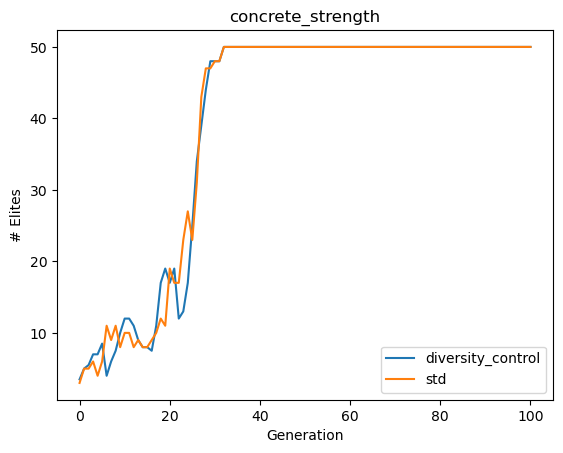

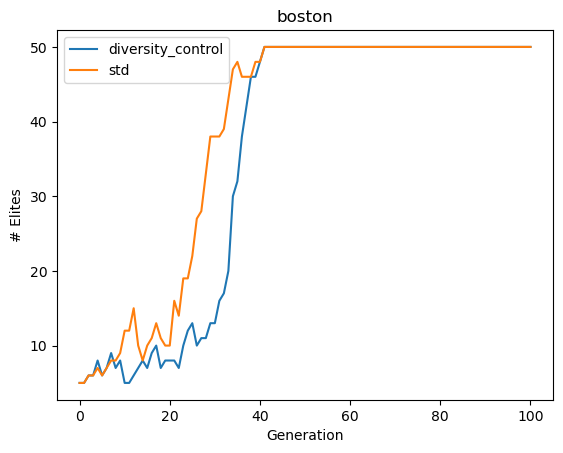

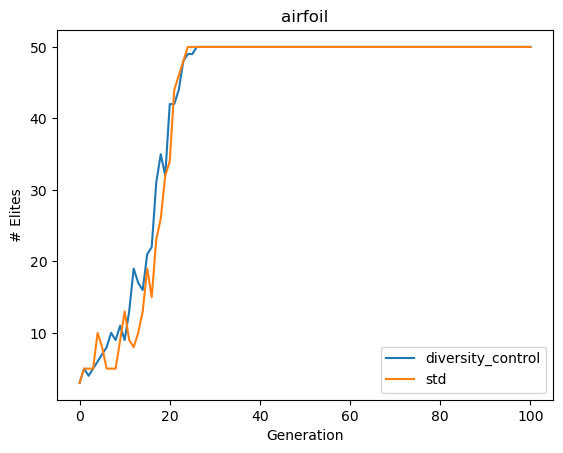

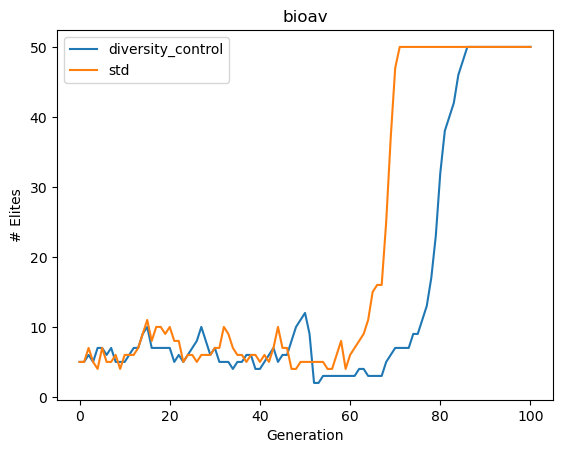

In [22]:
for dataset in datas:
    for rc in  [True, False]:
    
        selected = data[(data['dataset'] == dataset) &
                        (data['remove_copies'] == rc)][
                        ['generation', 'n_elites']].groupby('generation').median()
    
        plt.plot(selected.index, selected['n_elites'], label = 'diversity_control' if rc else 'std')


    plt.legend()
    plt.title(dataset)
    plt.xlabel('Generation')
    plt.ylabel('# Elites')
    
    
    plt.show()


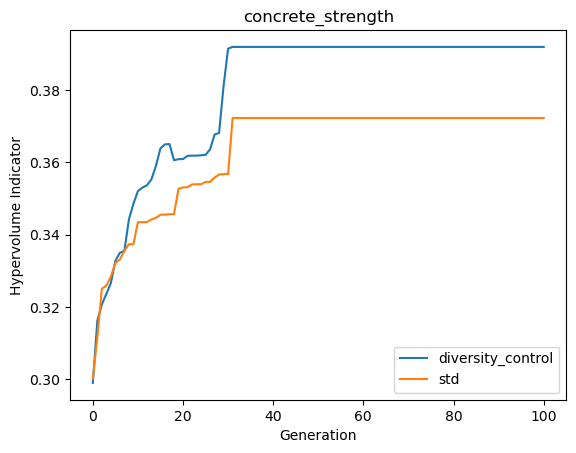

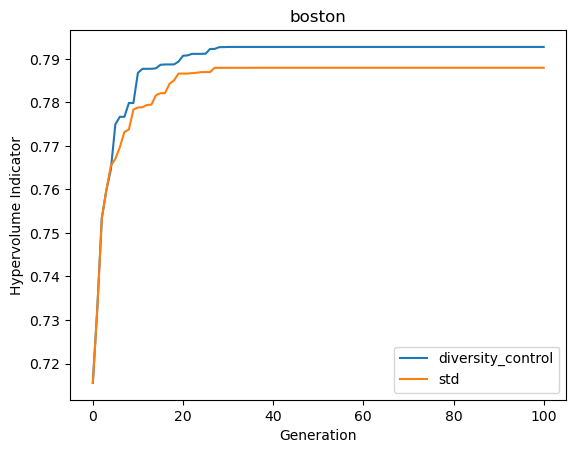

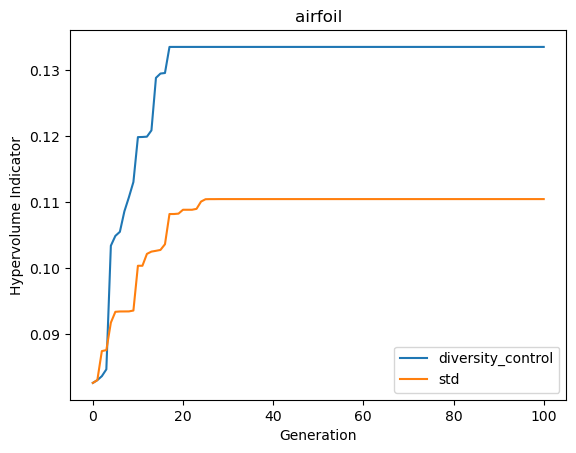

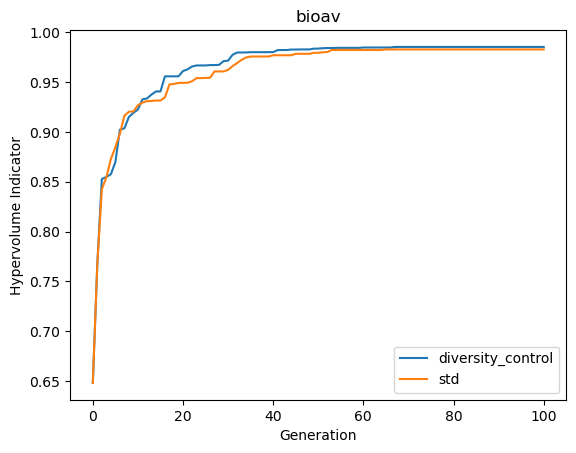

In [23]:
for dataset in datas:

    for rc in  [True, False]:
    
        selected = data[(data['dataset'] == dataset)  &
                        (data['remove_copies'] == rc)][
        ['generation', 'hypervolume_indicator']].groupby('generation').median()
    
        plt.plot(selected.index, selected['hypervolume_indicator'], label = 'diversity_control' if rc else 'std')
    plt.xlabel('Generation')
    plt.ylabel('Hypervolume Indicator')
    plt.title(dataset)
    plt.legend()
    
    plt.show()


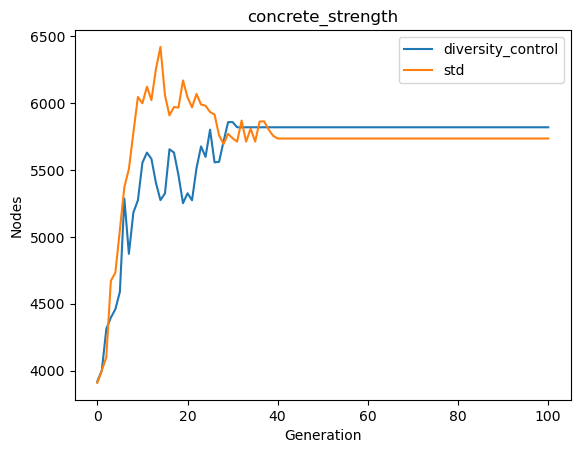

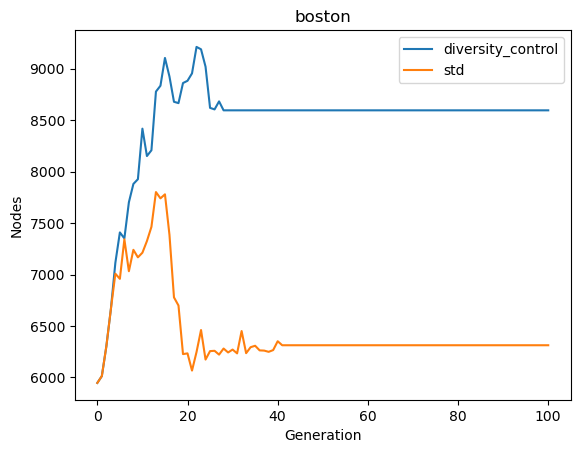

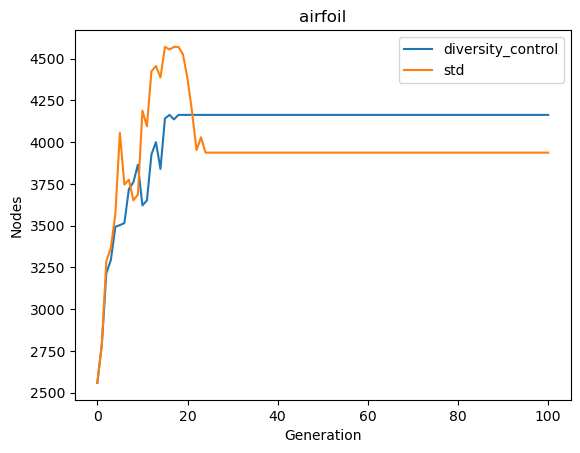

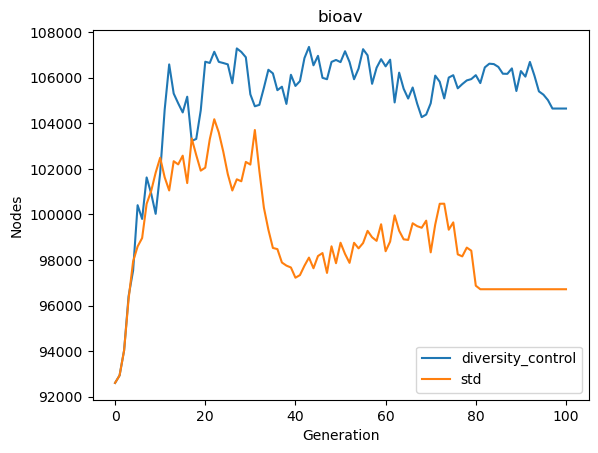

In [24]:
for dataset in datas:

    for rc in  [True, False]:
        selected = data[(data['dataset'] == dataset) &
                        (data['remove_copies'] == rc)][
        ['generation', 'nodes']].groupby('generation').median()
    
        plt.plot(selected.index, selected['nodes'], label = 'diversity_control' if rc else 'std')
        
    plt.xlabel('Generation')
    plt.ylabel('Nodes')
    plt.title(dataset)
    plt.legend()
    
    plt.show()


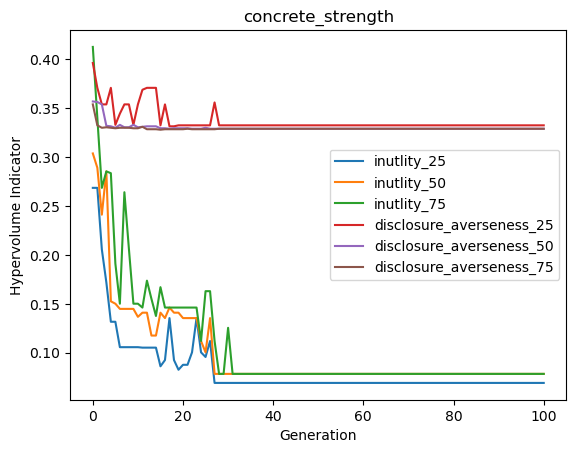

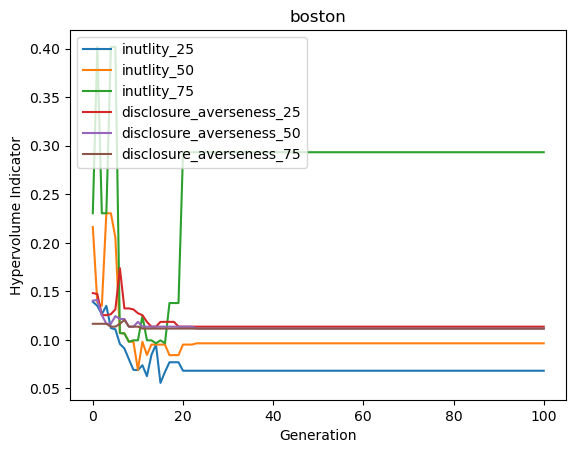

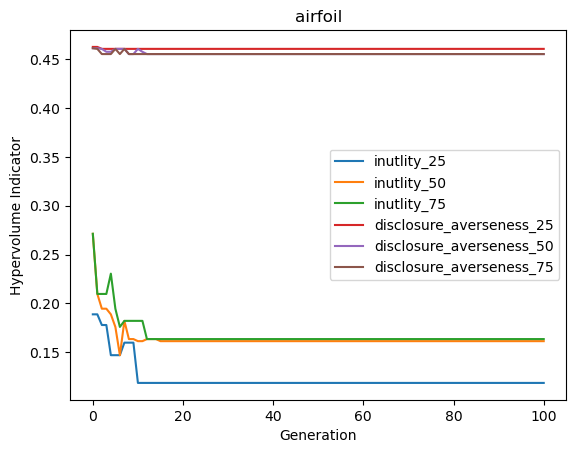

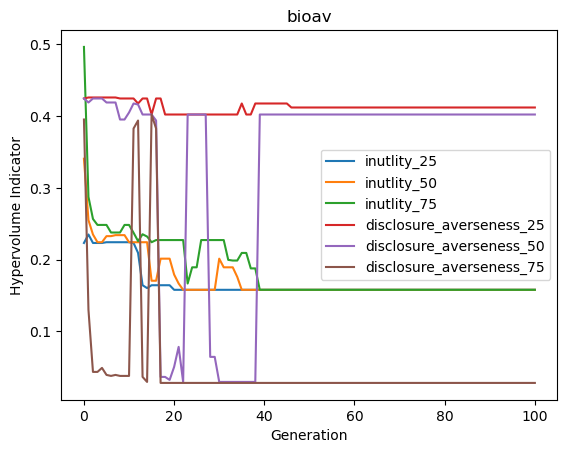

In [12]:
for dataset in datas:
    for metric in ['inutlity_25', 'inutlity_50', 'inutlity_75','disclosure_averseness_25', 'disclosure_averseness_50','disclosure_averseness_75']:
    
        selected = data[(data['dataset'] == dataset)][['generation',metric ]
                                                       ].groupby('generation').median()

        plt.plot(selected.index, selected[metric], label = metric)
    plt.xlabel('Generation')
    plt.ylabel('Hypervolume Indicator')
    plt.title(dataset)
    plt.legend()
    plt.show()


In [13]:
data

,dataset,nodes,inutility,disclosure_averseness,pareto_nodes,seed,generation,timing,percentiles,inutlity_25,inutlity_50,inutlity_75,disclosure_averseness_25,disclosure_averseness_50,disclosure_averseness_75,hypervolume_indicator
0,concrete_strength,1481,"[0.303639805464869, 0.13169125748016627, 0.287...","[0.35373134328358224, 0.5, 0.4980099502487563,...","[97, 68, 75, 83]",0,0,21.859458,"(0.28734913236372106, 0.303639805464869, 0.303...",0.287349,0.303640,0.303640,0.498010,0.353731,0.353731,0.248157
1,concrete_strength,1636,"[0.303639805464869, 0.13169125748016627, 0.287...","[0.35373134328358224, 0.5, 0.4980099502487563,...","[97, 68, 75, 104, 116]",0,1,21.159489,"(0.28734913236372106, 0.303639805464869, 0.340...",0.287349,0.303640,0.340054,0.498010,0.353731,0.329353,0.289390
2,concrete_strength,1807,"[0.303639805464869, 0.13169125748016627, 0.287...","[0.35373134328358224, 0.5, 0.4980099502487563,...","[97, 68, 75, 104, 116, 112, 111]",0,2,15.889532,"(0.303639805464869, 0.3175756405229937, 0.3400...",0.303640,0.317576,0.340054,0.353731,0.353731,0.329353,0.290120
3,concrete_strength,2019,"[0.13169125748016627, 0.3400544562821882, 0.45...","[0.5, 0.32935323383084575, 0.3288557213930348,...","[68, 104, 116, 112, 94, 121, 99]",0,3,13.817563,"(0.273301834754396, 0.3328167246827167, 0.3400...",0.273302,0.332817,0.340054,0.353731,0.331841,0.329353,0.295003
4,concrete_strength,2032,"[0.13169125748016627, 0.3400544562821882, 0.45...","[0.5, 0.32935323383084575, 0.3288557213930348,...","[68, 104, 116, 112, 94, 116, 127, 68, 68, 87]",0,4,13.418740,"(0.13169125748016627, 0.273301834754396, 0.340...",0.131691,0.273302,0.340054,0.500000,0.353731,0.329353,0.308071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,bioav,43504,"[0.12841279242090484, 0.07803060771087914, 0.1...","[0.009776536312849202, 0.013966480446927387, 0...","[2177, 2150, 2177, 2177, 2217, 2177, 2177, 212...",4,96,136.970856,"(0.12841279242090484, 0.12841279242090484, 0.1...",0.128413,0.128413,0.128413,0.009777,0.009777,0.009777,0.950271
2016,bioav,43504,"[0.12841279242090484, 0.07803060771087914, 0.1...","[0.009776536312849202, 0.013966480446927387, 0...","[2177, 2150, 2177, 2177, 2217, 2177, 2177, 212...",4,97,136.654383,"(0.12841279242090484, 0.12841279242090484, 0.1...",0.128413,0.128413,0.128413,0.009777,0.009777,0.009777,0.950271
2017,bioav,43504,"[0.12841279242090484, 0.07803060771087914, 0.1...","[0.009776536312849202, 0.013966480446927387, 0...","[2177, 2150, 2177, 2177, 2217, 2177, 2177, 212...",4,98,136.669890,"(0.12841279242090484, 0.12841279242090484, 0.1...",0.128413,0.128413,0.128413,0.009777,0.009777,0.009777,0.950271
2018,bioav,43504,"[0.12841279242090484, 0.07803060771087914, 0.1...","[0.009776536312849202, 0.013966480446927387, 0...","[2177, 2150, 2177, 2177, 2217, 2177, 2177, 212...",4,99,137.643368,"(0.12841279242090484, 0.12841279242090484, 0.1...",0.128413,0.128413,0.128413,0.009777,0.009777,0.009777,0.950271


In [29]:
baselines = {'concrete_strength': [(0.0, 0.5), (0.5712910920430821, 0.1955223880597015)],
             'boston': [(0.0, 0.5), (0.6788396089001241, 0.28952569169960474)],
             'airfoil': [(0.0, 0.5), (0.7732035508463126, 0.4228210246174319)],
             'bioav': [(0.0, 0.49999999999999994), (0.2995160410175487, 0.3589385474860335)]}


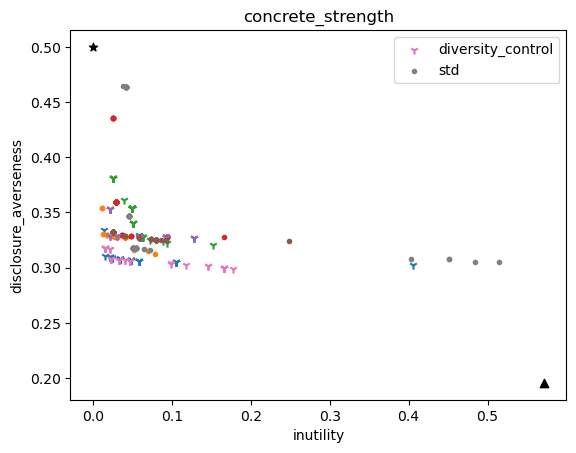

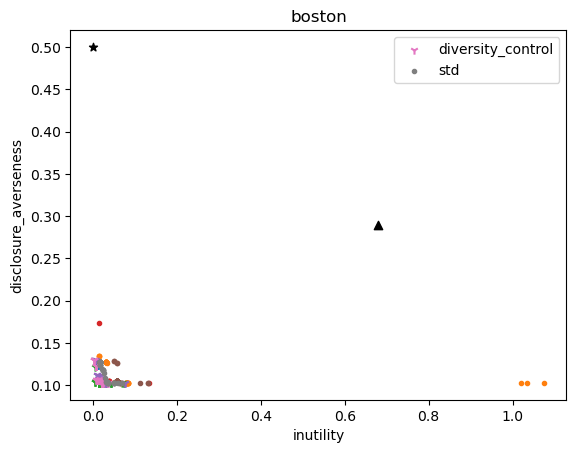

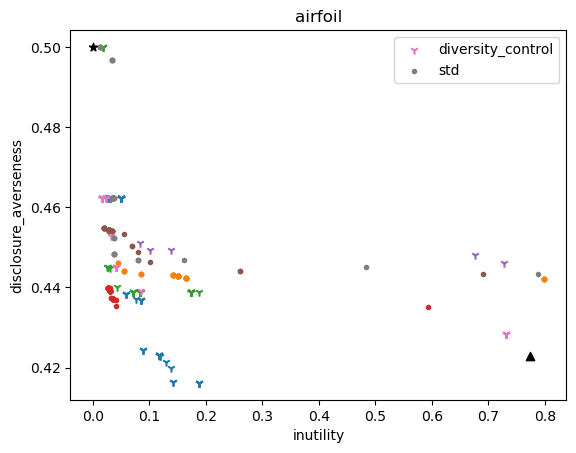

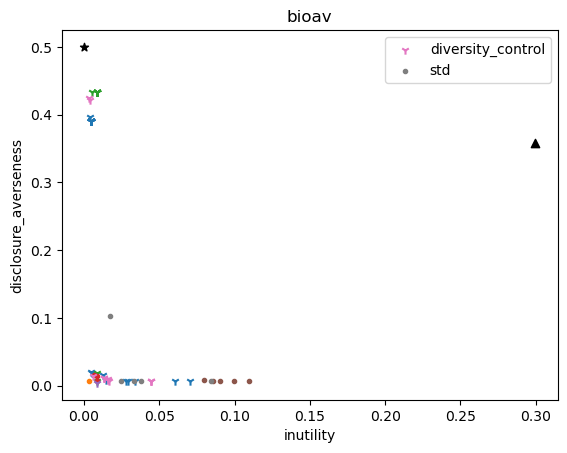

In [36]:
for dataset in datas:
    for seed in range(4):

        for rc in  [True, False]:

            selected = data[(data['generation'] == 50) &
                (data['dataset'] == dataset) &
                (data['seed'] == seed) &
                (data['remove_copies'] == rc)] 
            
            plt.scatter(eval(selected['inutility'].values[0]), eval(selected['disclosure_averseness'].values[0]), 
                        marker = '1' if rc else '.',
                        # alpha = 0.5,
                        label = ('diversity_control' if rc else 'std') if seed == 3 else None)

    plt.scatter(baselines[dataset][0][0], baselines[dataset][0][1], marker = "*", color = 'black')
    plt.scatter(baselines[dataset][1][0], baselines[dataset][1][1], marker = "^", color = 'black')
        
    plt.xlabel('inutility')
    plt.ylabel('disclosure_averseness')
    plt.title(dataset)
    plt.legend()
    plt.show()

In [38]:
data['inutility'] = data['inutility'].apply(lambda x : eval(x))

In [39]:
data['disclosure_averseness'] = data['disclosure_averseness'].apply(lambda x : eval(x))

In [43]:
for dataset in datas:
    print(dataset)
    for metric in ['inutility', 'disclosure_averseness']:
        print(metric)
        seed = np.argmin(data[(data['generation'] == 100) 
                & (data['dataset'] == dataset)][metric].values)
        print(seed, np.argmin(data[(data['generation'] == 100) 
                & (data['dataset'] == dataset) 
                &  (data['seed'] == seed)][metric].values))
    print('\n')

concrete_strength
inutility
2 0
disclosure_averseness
2 0


boston
inutility
0 0
disclosure_averseness
2 0


airfoil
inutility
2 0
disclosure_averseness
4 0


bioav
inutility
0 0
disclosure_averseness
4 0


